In [1]:
import numpy as np
import networkx as nx
import cv2
from matplotlib import pyplot as plt

In [2]:

def array_to_graph(arr):
    # Create a graph
    G = nx.Graph()
    
    rows, cols = arr.shape
    
    # Add nodes
    for i in range(rows):
        for j in range(cols):
            if arr[i, j] == 1:
                G.add_node((i, j))
    
    # Add edges
    for i in range(rows):
        for j in range(cols):
            if arr[i, j] == 1:
                # Check right neighbor
                if j + 1 < cols and arr[i, j+1] == 1:
                    G.add_edge((i, j), (i, j+1), weight=1)
                
                # Check bottom neighbor
                if i + 1 < rows and arr[i+1, j] == 1:
                    G.add_edge((i, j), (i+1, j), weight=1)
    
    return G

In [1]:
def resize_image(image, dims):
    print(dims)
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    
    resized_image = cv2.resize(image, (dims[0], dims[1]), interpolation=cv2.INTER_AREA)
    
    # Convert the resized image to grayscale if it's not already
    if len(resized_image.shape) == 3:
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = resized_image
    
    # Normalize the array to have values between 0 and 1
    normalized_array = grayscale_image.astype(np.float32) / 255.0
    
    return normalized_array

fire = cv2.imread("images/21548917.png")
fire = resize_image(fire, (25, 25))
# bw, _, _ = cv2.split(fire)

maskII = np.asarray([[_el if _el != 255 else 1 for _el in _ar] for _ar in bw])


graph = array_to_graph(maskII)
tree = nx.minimum_spanning_tree(graph)

In [2]:
fire = cv2.imread("images/21548917.png")
fire = resize_image(fire, (25, 25))
# bw, _, _ = cv2.split(fire)

maskII = np.asarray([[_el if _el != 255 else 1 for _el in _ar] for _ar in bw])


graph = array_to_graph(maskII)
tree = nx.minimum_spanning_tree(graph)

NameError: name 'cv2' is not defined

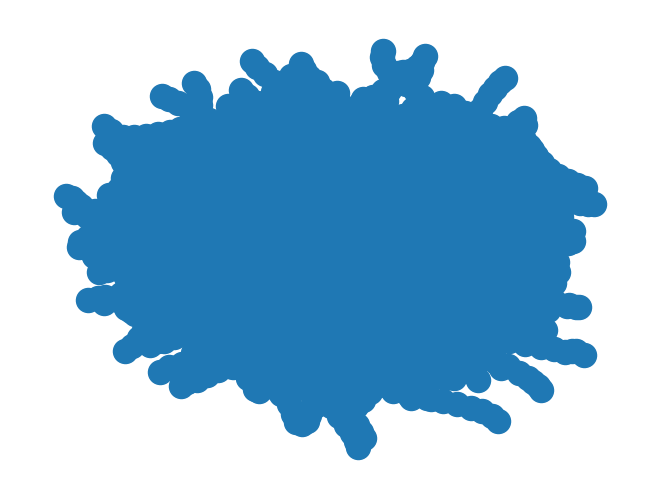

In [ ]:
# Example usage
arr = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

graph = array_to_graph(arr)

# Print some information about the graph
print(f"Number of nodes: {graph.number_of_nodes()}")
print(f"Number of edges: {graph.number_of_edges()}")
print("Edges:", list(graph.edges(data=True)))

In [54]:
import numpy as np
import cv2
from tsp_solver.greedy import solve_tsp
from itertools import product
from matplotlib import pyplot as plt

def resize_image(image, dims):
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    resized_image = cv2.resize(image, (dims[0], dims[1]), interpolation=cv2.INTER_AREA)
    
    # Convert the resized image to grayscale if it's not already
    if len(resized_image.shape) == 3:
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = resized_image
    
    # Normalize the array to have values between 0 and 1
    normalized_array = grayscale_image.astype(np.float32) / 255.0
    
    return normalized_array

def create_distance_matrix(mask):
    white_pixels = np.argwhere(mask == 1)
    n = len(white_pixels)
    
    # Create an empty distance matrix
    dist_matrix = np.zeros((n, n))
    
    # Calculate Manhattan distances between all pairs of white pixels
    for i, (y1, x1) in enumerate(white_pixels):
        for j, (y2, x2) in enumerate(white_pixels[i+1:], i+1):
            dist = abs(y1 - y2) + abs(x1 - x2)
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    
    return dist_matrix, white_pixels

# # Load and process the image
# fire = cv2.imread("images/21548917.png")
# bw = resize_image(fire, (25, 25))

# # Create the bitmask
# mask = np.asarray([[1 if el != 255 else 0 for el in ar] for ar in bw])

# # Create the distance matrix
# dist_matrix, white_pixels = create_distance_matrix(mask)

# # Solve the TSP
# path = solve_tsp(dist_matrix)

# # Convert the path indices to pixel coordinates
# pixel_path = white_pixels[path]

# print("Optimal path through white pixels:")
# for pixel in pixel_path:
#     print(f"({pixel[1]}, {pixel[0]})")

In [10]:
def visualize_path(mask, path, white_pixels):
    # Create a color image from the mask
    vis_img = np.stack([mask*255]*3, axis=-1).astype(np.uint8)
    
    # Draw the path
    for i in range(len(path)):
        start = tuple(white_pixels[path[i]][::-1])
        end = tuple(white_pixels[path[(i+1) % len(path)]][::-1])
        color = (0, 255, 0)  # Green color for the path
        thickness = 1
        cv2.line(vis_img, start, end, color, thickness)
    
    # Mark start and end points
    start = tuple(white_pixels[path[0]][::-1])
    cv2.circle(vis_img, start, 3, (0, 0, 255), -1)  # Red circle for start
    end = tuple(white_pixels[path[-1]][::-1])
    cv2.circle(vis_img, end, 3, (255, 0, 0), -1)  # Blue circle for end

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(vis_img)
    plt.title("TSP Path Visualization")
    plt.axis('off')
    plt.show()

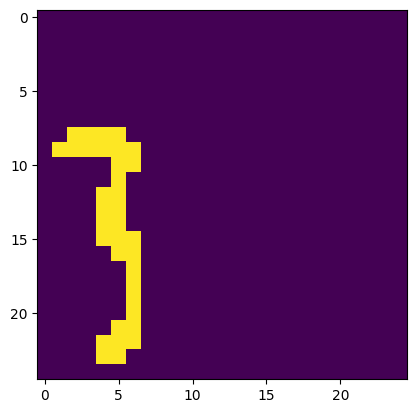

In [55]:
# Load and process the image
fire = cv2.imread("images/21548917.png")
bw = resize_image(fire, (25, 25))
bw = np.asarray([[_el if _el != 255 else 1 for _el in _ar] for _ar in bw])
bw, _, _ = cv2.split(fire)
bw = resize_image(fire, (25, 25))

Y = bw.copy()

for i in range(bw.shape[0]):
    for j in range(bw.shape[1]):
        if (bw[i][j] > 0):
            Y[i][j] = 1
        else:
            Y[i][j] = 0

plt.imshow(Y)



# def binarize_array(X):
#     """
#     Takes a 2D numpy array X as input and returns a new array of the same size.
#     All values greater than 1 are replaced with 1, while 0s remain 0.
    
#     Parameters:
#     X (np.ndarray): Input 2D numpy array
    
#     Returns:
#     np.ndarray: Modified 2D numpy array
#     """
#     if not isinstance(X, np.ndarray) or X.ndim != 2:
#         raise ValueError("Input must be a 2D numpy array")
    
#     # Create a copy to avoid modifying the original array
#     Y = X.copy()
    
#     # Replace all values greater than 1 with 1
#     Y[Y > 1] = 1
    
#     return Y

# bw = binarize_array(bw)

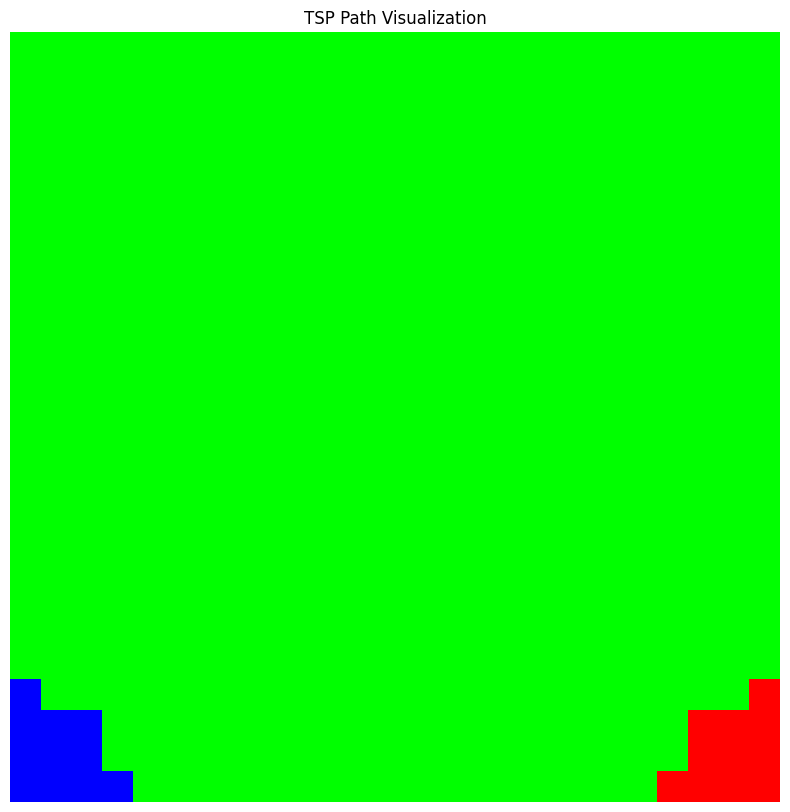

Optimal path through white pixels:
(0, 24)
(1, 24)
(2, 24)
(3, 24)
(4, 24)
(5, 24)
(6, 24)
(7, 24)
(8, 24)
(9, 24)
(10, 24)
(11, 24)
(12, 24)
(13, 24)
(14, 24)
(15, 24)
(16, 24)
(17, 24)
(18, 24)
(19, 24)
(20, 24)
(21, 24)
(22, 24)
(23, 24)
(23, 23)
(22, 23)
(21, 23)
(20, 23)
(19, 23)
(18, 23)
(17, 23)
(16, 23)
(15, 23)
(14, 23)
(13, 23)
(12, 23)
(11, 23)
(10, 23)
(9, 23)
(8, 23)
(7, 23)
(6, 23)
(5, 23)
(4, 23)
(3, 23)
(2, 23)
(1, 23)
(0, 23)
(0, 22)
(1, 22)
(2, 22)
(3, 22)
(4, 22)
(5, 22)
(6, 22)
(7, 22)
(8, 22)
(9, 22)
(10, 22)
(11, 22)
(12, 22)
(13, 22)
(14, 22)
(15, 22)
(16, 22)
(17, 22)
(18, 22)
(19, 22)
(20, 22)
(21, 22)
(22, 22)
(23, 22)
(23, 21)
(22, 21)
(21, 21)
(20, 21)
(19, 21)
(18, 21)
(17, 21)
(16, 21)
(15, 21)
(14, 21)
(13, 21)
(12, 21)
(11, 21)
(10, 21)
(9, 21)
(8, 21)
(7, 21)
(6, 21)
(5, 21)
(4, 21)
(3, 21)
(2, 21)
(1, 21)
(0, 21)
(0, 20)
(1, 20)
(2, 20)
(3, 20)
(4, 20)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(9, 20)
(10, 20)
(11, 20)
(12, 20)
(13, 20)
(14, 20)
(15, 20)
(16, 20

In [16]:

# Create the bitmask
mask = np.asarray([[1 if el != 255 else 0 for el in ar] for ar in bw])

# Create the distance matrix
dist_matrix, white_pixels = create_distance_matrix(mask)

# Solve the TSP
path = solve_tsp(dist_matrix)

# Visualize the result
visualize_path(mask, path, white_pixels)

print("Optimal path through white pixels:")
for pixel in white_pixels[path]:
    print(f"({pixel[1]}, {pixel[0]})")

(25, 25)
Optimal path: [4, 5, 35, 0, 1, 2, 3, 36, 8, 7, 6, 9, 37, 11, 10, 38, 12, 39, 14, 13, 40, 15, 16, 41, 18, 17, 42, 19, 20, 21, 43, 23, 22, 44, 24, 45, 25, 46, 26, 47, 27, 48, 29, 28, 49, 31, 30, 50, 33, 34, 51, 32]
Coordinates of the path:
[9 1]
[9 2]
[8 2]
[8 2]
[8 3]
[8 4]
[8 5]
[9 5]
[9 5]
[9 4]
[9 3]
[9 6]
[10  6]
[10  6]
[10  5]
[11  5]
[11  5]
[12  5]
[12  5]
[12  4]
[13  4]
[13  4]
[13  5]
[14  5]
[14  5]
[14  4]
[15  4]
[15  4]
[15  5]
[15  6]
[16  6]
[16  6]
[16  5]
[17  5]
[17  6]
[18  6]
[18  6]
[19  6]
[19  6]
[20  6]
[20  6]
[21  6]
[21  6]
[21  5]
[22  5]
[22  5]
[22  4]
[23  4]
[23  4]
[23  5]
[22  5]
[22  6]


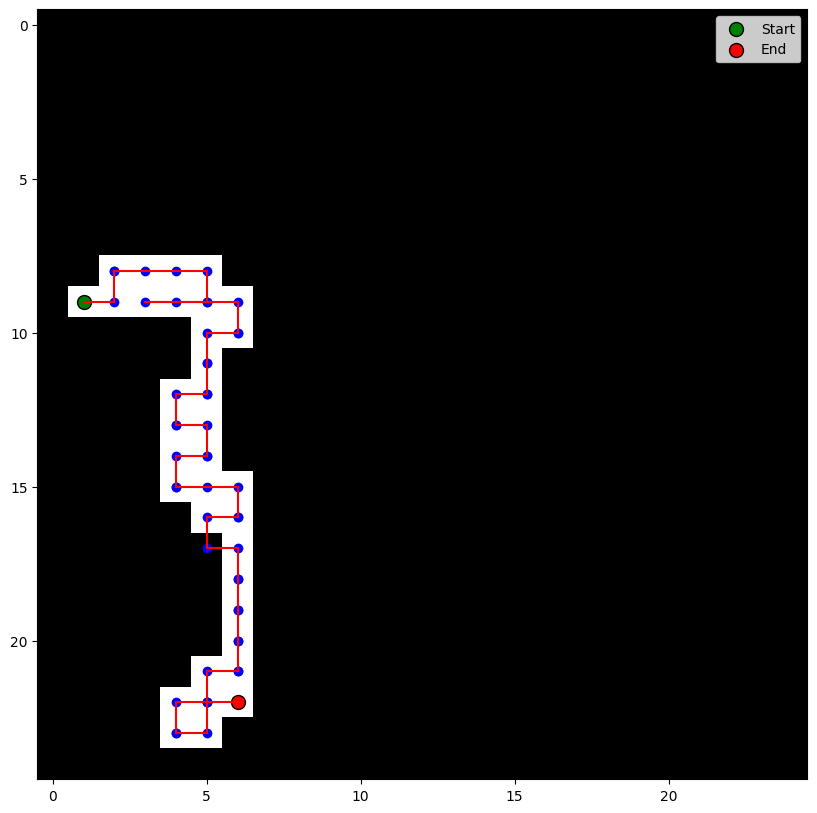

In [70]:
import numpy as np
import cv2
from tsp_solver.greedy import solve_tsp
import matplotlib.pyplot as plt

def resize_image(image, dims):
    print(dims)
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    resized_image = cv2.resize(image, (dims[0], dims[1]), interpolation=cv2.INTER_AREA)
    
    # Convert the resized image to grayscale if it's not already
    if len(resized_image.shape) == 3:
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = resized_image
    
    # Normalize the array to have values between 0 and 1
    normalized_array = grayscale_image.astype(np.float32) / 255.0
    return normalized_array

def generate_bitmask(bw):
    Y = bw.copy()
    for i in range(bw.shape[0]):
        for j in range(bw.shape[1]):
            if (bw[i][j] > 0):
                Y[i][j] = 1
            else:
                Y[i][j] = 0
    return Y

def find_white_pixel_coordinates(bitmask):
    return np.argwhere(bitmask == 1)

def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def generate_distance_matrix(coordinates):
    size = len(coordinates)
    distance_matrix = np.zeros((size, size))
    
    for i in range(size):
        for j in range(i + 1, size):
            dist = manhattan_distance(coordinates[i], coordinates[j])
            distance_matrix[i][j] = dist
            distance_matrix[j][i] = dist
    
    return distance_matrix

def visualize_path(bitmask, coordinates, path):
    plt.figure(figsize=(10, 10))
    plt.imshow(bitmask, cmap='gray')
    
    # Plotting the path
    for i in range(len(path) - 1):
        start = coordinates[path[i]]
        end = coordinates[path[i + 1]]
        plt.plot([start[1], end[1]], [start[0], end[0]], 'r-')
    
    # Plot all points in blue
    plt.scatter(coordinates[:, 1], coordinates[:, 0], c='blue')
    
    # Plot start point in green
    plt.scatter(coordinates[path[0]][1], coordinates[path[0]][0], c='green', s=100, label='Start', edgecolor='black')
    
    # Plot end point in red
    plt.scatter(coordinates[path[-1]][1], coordinates[path[-1]][0], c='red', s=100, label='End', edgecolor='black')
    
    plt.legend()
    plt.show()

def post_process_path(coordinates, path):
    new_path = [path[0]]
    new_coordinates = coordinates.copy()
    for i in range(1, len(path)):
        current = coordinates[path[i-1]]
        next = coordinates[path[i]]
        
        # Add vertical movement
        if current[0] != next[0]:
            new_path.append(len(new_coordinates))
            new_coordinates = np.vstack((new_coordinates, [next[0], current[1]]))
        
        # Add horizontal movement
        new_path.append(path[i])
    
    return new_coordinates, new_path

# Main execution
fire = cv2.imread("images/21548917.png")
bw, _, _ = cv2.split(fire)
bw = resize_image(fire, (25, 25))
bitmask = generate_bitmask(bw)
coordinates = find_white_pixel_coordinates(bitmask)
distance_matrix = generate_distance_matrix(coordinates)
path = solve_tsp(distance_matrix)

# Post-process the path to ensure only vertical and horizontal movements
coordinates, path = post_process_path(coordinates, path)

print("Optimal path:", path)
print("Coordinates of the path:")
for idx in path:
    print(coordinates[idx])

visualize_path(bitmask, coordinates, path)

(25, 25)


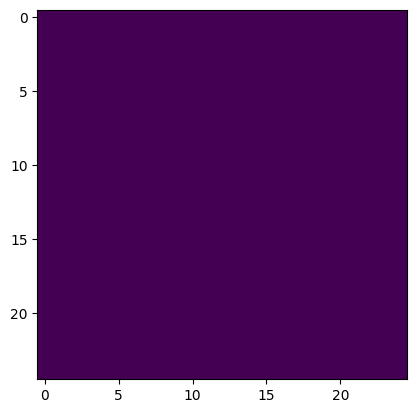

In [24]:
plt.imshow(generate_bitmask(image_path="images/21548917.png"))

Optimal path: [32, 31, 30, 22, 17, 18, 16, 15, 11, 9, 8, 3, 2, 1, 0, 5, 4, 6, 7, 10, 12, 14, 13, 19, 20, 21, 23, 24, 25, 26, 27, 29, 28, 33, 34]
Coordinates of the path:
[22  6]
[22  5]
[22  4]
[16  5]
[14  4]
[14  5]
[13  5]
[13  4]
[10  6]
[9 6]
[9 5]
[8 5]
[8 4]
[8 3]
[8 2]
[9 2]
[9 1]
[9 3]
[9 4]
[10  5]
[11  5]
[12  5]
[12  4]
[15  4]
[15  5]
[15  6]
[16  6]
[17  6]
[18  6]
[19  6]
[20  6]
[21  6]
[21  5]
[23  4]
[23  5]


/home/prakhargaming/miniconda3/envs/FastSAM/lib/python3.10/site-packages/tsp_solver/greedy.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  delta_d = ds(a,b)+ds(c,d) -( ds(a,c)+ds(b,d))


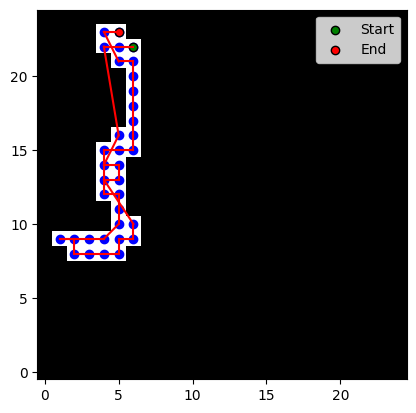

In [67]:
import numpy as np
import cv2
from tsp_solver.greedy import solve_tsp
import matplotlib.pyplot as plt
from collections import deque

def resize_image(image, dims):
    if not isinstance(image, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    resized_image = cv2.resize(image, (dims[0], dims[1]), interpolation=cv2.INTER_AREA)
    
    # Convert the resized image to grayscale if it's not already
    if len(resized_image.shape) == 3:
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = resized_image
    
    # Normalize the array to have values between 0 and 1
    normalized_array = grayscale_image.astype(np.float32) / 255.0
    return normalized_array

def generate_bitmask(bw):
    Y = bw.copy()
    for i in range(bw.shape[0]):
        for j in range(bw.shape[1]):
            if (bw[i][j] > 0):
                Y[i][j] = 1
            else:
                Y[i][j] = 0
    return Y

def find_white_pixel_coordinates(bitmask):
    return np.argwhere(bitmask == 1)

def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def generate_distance_matrix(coordinates):
    size = len(coordinates)
    distance_matrix = np.full((size, size), np.inf)
    
    for i in range(size):
        for j in range(i + 1, size):
            dist = manhattan_distance(coordinates[i], coordinates[j])
            if dist == 1:  # Only consider adjacent points (Manhattan distance of 1)
                distance_matrix[i][j] = dist
                distance_matrix[j][i] = dist
    
    return distance_matrix

def bfs_paths(bitmask, start):
    """ Breadth-First Search to ensure only horizontal and vertical moves are allowed """
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    queue = deque([start])
    visited = set([start])
    graph = {start: []}

    while queue:
        current = queue.popleft()
        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if (0 <= neighbor[0] < bitmask.shape[0] and
                0 <= neighbor[1] < bitmask.shape[1] and
                bitmask[neighbor] == 1 and
                neighbor not in visited):
                visited.add(neighbor)
                queue.append(neighbor)
                if current not in graph:
                    graph[current] = []
                if neighbor not in graph:
                    graph[neighbor] = []
                graph[current].append(neighbor)
                graph[neighbor].append(current)
    return graph

def visualize_path(bitmask, coordinates, path):
    plt.imshow(bitmask, cmap='gray')
    
    # Plotting the path
    for i in range(len(path) - 1):
        start = coordinates[path[i]]
        end = coordinates[path[i + 1]]
        plt.plot([start[1], end[1]], [start[0], end[0]], 'r-')
    
    # Plot all points in blue
    plt.scatter(coordinates[:, 1], coordinates[:, 0], c='blue')
    
    # Plot start point in green
    plt.scatter(coordinates[path[0]][1], coordinates[path[0]][0], c='green', label='Start', edgecolor='black')
    
    # Plot end point in red
    plt.scatter(coordinates[path[-1]][1], coordinates[path[-1]][0], c='red', label='End', edgecolor='black')
    
    plt.gca().invert_yaxis()  # To match the image coordinate system
    plt.legend()
    plt.show()

fire = cv2.imread("images/21548917.png")
bw, _, _ = cv2.split(fire)
bw = resize_image(fire, (25, 25))

bitmask = generate_bitmask(bw)
coordinates = find_white_pixel_coordinates(bitmask)

graph = bfs_paths(bitmask, tuple(coordinates[0]))

# Convert graph to distance matrix
index_map = {tuple(coord): idx for idx, coord in enumerate(coordinates)}
distance_matrix = np.full((len(coordinates), len(coordinates)), np.inf)

for node, neighbors in graph.items():
    for neighbor in neighbors:
        distance_matrix[index_map[node]][index_map[neighbor]] = 1
        distance_matrix[index_map[neighbor]][index_map[node]] = 1

path = solve_tsp(distance_matrix)

print("Optimal path:", path)
print("Coordinates of the path:")
for idx in path:
    print(coordinates[idx])

visualize_path(bitmask, coordinates, path)